I found the data set here: https://www.kaggle.com/sogun3/uspollution. However, I modified it first to just California pollution, rather than the entire United States, and then later to just Los Angeles pollution. 

You can work with the original data set and I'll provide a code below to convert it to just Los Angeles data; that's purely for learning how to clean data. Alternatively, you can just look at the Los Angeles csv file I provide on GitHub (the other two files are too large for GitHub). 

We will analyze the four major pollutants: Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO), and Ozone (O3) in the city of Los Angeles. I'm interested to see how these change over time (2000-2016). I will also upload a Tableau dashboard, comparing prior years to current year.  

AQI stands for air quality index. 4 out of the 5 major pollutants are calculated - excluding particulate matter - in this data set. Here is a chart that illustrates this: 

<img src="files/image.png">

On another note, keep in mind that ozone in the atmosphere has a different effect that the ground-level ozone that is being measured here. Oxygen (O2 in natural form) in the stratosphere reacts with ultraviolet light, which then breaks it down into two single Oxygen atoms. These single atoms will collide with natural oxygen (O2) to make O3, which protects the Earth from ultraviolet rays. 

# Imports

In [1]:
# I/O and Computation 
import pandas as pd 
import numpy as np

# visualization
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Standard plotly imports 
import plotly.plotly as py
import plotly.graph_objs as go

# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Using plotly + cufflinks in offline mode 
import cufflinks as cf 
cf.go_offline(connected=True) 
init_notebook_mode(connected=True) 


# read, with index values reset to default primary keys
# original pollution csv file made smaller to observe just 
# California. Then this csv file is made even smaller by
# looking at Los Angeles. On Github, only the Los Angeles csv
# file will be provided, but you can use the link above to 
# start from scratch. Code is below: 

# df = pd.read_csv('pollution_us_2000_2016.csv')
# df_cal = df.copy()
# df_cal = df_cal.loc[df_cal['State']=='California']
# df_cal.to_csv('pollution_california.csv', encoding='utf-8', index=False)
df_los = pd.read_csv("pollution_la.csv", index_col=False)

# Data Cleaning

**Objective**
- Take out unnecessary columns
- Eliminate missing values 
- Restrict this csv file to Los Angeles area. 

Some of these columns are unnecessary to our analysis - address, site num, country code, etc. The values we mainly care about are the date, the air quality index, and potentially the mean values. 

In [2]:
#df_cal = df.copy() 
#df_cal = df_cal.drop(['Unnamed: 0','State Code','County Code','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units', 'State', 'County'],axis=1)
#df_cal.head()
#df_los = df_cal.loc[df_cal['City']=='Los Angeles']
df_los.head()

,Datetime,Year,Month,Day,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,CO 1st Max Hour,CO AQI,CO AQI 2000,CO AQI 2015,NO2 AQI 2000,NO2 AQI 2015,O3 AQI 2000,O3 AQI 2015,SO2 AQI 2000,SO2 AQI 2015
0,2000-03-01,2000,3,1,Los Angeles,2000-03-01,33.521739,48.0,22,45,...,8,18.0,18.5,6.4,60.3,31.3,32.7,43.0,7.14,0.85
1,2000-03-02,2000,3,2,Los Angeles,2000-03-02,44.173913,55.0,18,52,...,4,25.0,18.5,6.4,60.3,31.3,32.7,43.0,7.14,0.85
2,2000-03-03,2000,3,3,Los Angeles,2000-03-03,32.608696,42.0,18,40,...,0,11.0,18.5,6.4,60.3,31.3,32.7,43.0,7.14,0.85
3,2000-03-04,2000,3,4,Los Angeles,2000-03-04,31.347826,42.0,10,40,...,8,11.0,18.5,6.4,60.3,31.3,32.7,43.0,7.14,0.85
4,2000-03-05,2000,3,5,Los Angeles,2000-03-05,16.956522,42.0,22,40,...,23,9.0,18.5,6.4,60.3,31.3,32.7,43.0,7.14,0.85


Meanwhile, let's condense this into looking at just Los Angeles. 

In [3]:
#df_los = df_cal.loc[df_cal['City']=='Los Angeles']
df_los.shape

(10598, 30)

We should check for missing values. 

In [4]:
df_los.isna().sum()

Datetime             0
Year                 0
Month                0
Day                  0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
CO AQI 2000          0
CO AQI 2015          0
NO2 AQI 2000         0
NO2 AQI 2015         0
O3 AQI 2000          0
O3 AQI 2015          0
SO2 AQI 2000         0
SO2 AQI 2015         0
dtype: int64

We have many missing values. Let's eliminate these. 

In [5]:
df_los = df_los.dropna()

Now double check: 

In [6]:
df_los.isna().sum()

Datetime             0
Year                 0
Month                0
Day                  0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
CO AQI 2000          0
CO AQI 2015          0
NO2 AQI 2000         0
NO2 AQI 2015         0
O3 AQI 2000          0
O3 AQI 2015          0
SO2 AQI 2000         0
SO2 AQI 2015         0
dtype: int64

Let's try to group the data into years. The date local is presumably in datetime fashion, but it may be an object data type rather than a datetime one. 

In [7]:
df_los.dtypes.head(9)

Datetime              object
Year                   int64
Month                  int64
Day                    int64
City                  object
Date Local            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
dtype: object

As we can see date local is not in datetime format. We need to convert it. 

In [8]:
df_los['Datetime'] = pd.to_datetime(df_los['Date Local'], format='%Y-%m-%d')

In [9]:
#df_cal = df_cal.drop(['Unnamed: 0','State Code','County Code','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units', 'State', 'County'],axis=1)

In [10]:
df_los['Year']= df_los['Datetime'].dt.year
df_los['Month']= df_los['Datetime'].dt.month
df_los['Day'] = df_los['Datetime'].dt.day

# for Tableau uses
# df_los['CO AQI 2000'] = 18.5
# df_los['NO2 AQI 2000'] = 60.3
# df_los['O3 AQI 2000'] = 32.7
# df_los['SO2 AQI 2000'] = 7.14
# df_los['CO AQI 2015'] = 6.4
# df_los['NO2 AQI 2015']= 31.3
# df_los['O3 AQI 2015']=43.0
# df_los['SO2 AQI 2015']=0.85

# df_los = df_los[['Datetime', 'Year','Month', 'Day', 'City','Address', 'Date Local', 'NO2 Mean',
#        'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean',
#        'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
#        'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
#        'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'CO AQI 2000','CO AQI 2015','NO2 AQI 2000','NO2 AQI 2015','O3 AQI 2000','O3 AQI 2015', 'SO2 AQI 2000','SO2 AQI 2015']]

Now let's see one of our new columns, 'year'. 

In [11]:
# test to see if 'Year' column was created 
la_year = df_los.pivot_table(index='Year', values = ['NO2 AQI', 'O3 AQI','SO2 AQI','CO AQI']).sort_values(['Year'])
la_year.head()

,CO AQI,NO2 AQI,O3 AQI,SO2 AQI
Year,,,,
2000,18.503268,60.385621,32.722222,7.140523
2001,19.586854,57.236307,31.791862,7.502347
2002,18.159681,49.872255,33.708583,6.650699
2003,16.190751,51.745665,34.182081,5.520231
2004,10.663748,41.173380,41.443082,6.973730


# Visualization

Before we start to visualize, it's always good to look at some basic information. 

In [12]:
df_los.loc[:,['CO AQI','NO2 AQI','SO2 AQI','O3 AQI']].describe().T

,count,mean,std,min,25%,50%,75%,max
CO AQI,10598.0,9.552840,7.849160,0.0,5.0,8.0,13.0,66.0
NO2 AQI,10598.0,37.526703,19.043470,0.0,25.0,36.0,47.0,113.0
SO2 AQI,10598.0,3.736743,4.590276,0.0,0.0,3.0,6.0,100.0
O3 AQI,10598.0,34.730232,16.119299,1.0,26.0,34.0,42.0,172.0


I decided to look at AQI values over mean values. Mean values drastically differ between each pollutant; for instance, O3 is a much higher numerical value than the rest. I plan to plot all the pollutants simultaneously on some graphs. Rather than going through normalization, we can simply look at AQI index levels which are essentially giving us the same kind of basic information (i.e is pollution getting better or worse?). 

[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'AQI levels'),
 Text(0.5, 1.0, 'Distribution of AQI from 2000-2015')]

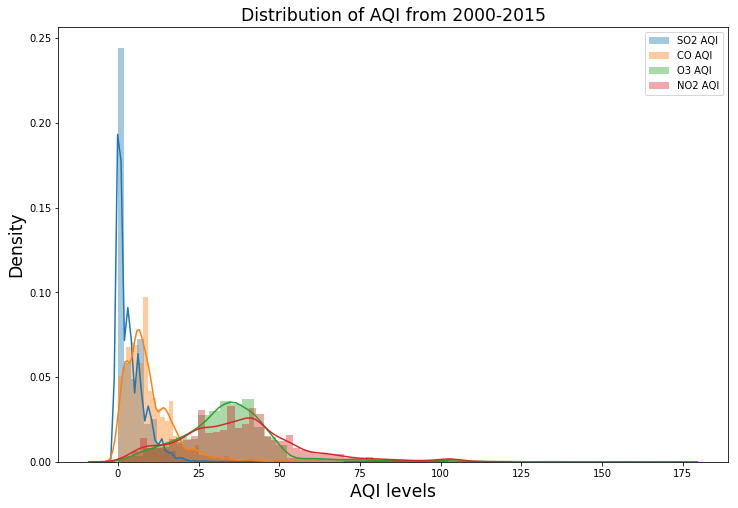

In [13]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'xx-large'
fig, ax = plt.subplots()

sns.distplot(df_los['SO2 AQI'], label='SO2 AQI')
sns.distplot(df_los['CO AQI'], label='CO AQI')
sns.distplot(df_los['O3 AQI'], label='O3 AQI')
sns.distplot(df_los['NO2 AQI'], label='NO2 AQI')

plt.legend()
ax.set(xlabel='AQI levels', ylabel='Density', title='Distribution of AQI from 2000-2015')

Out of all of these, only SO2 looks like a non-Gaussian distribution from 2000 to 2015. This right-skewed distribution is due to year 2010-2015 dramatically lower than all the other years while maintaining similar values over time. 

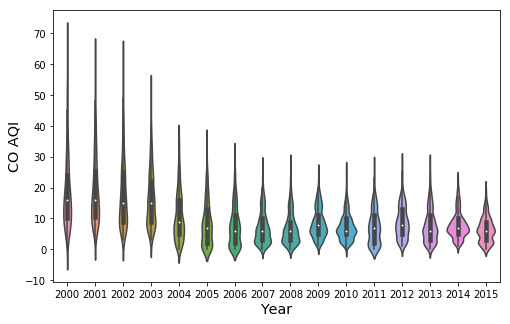

In [14]:
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.violinplot(x="Year", y="CO AQI",data=df_los)


Looking at CO AQI, we can see that CO outliers have drastically been curbed down. This suggests that the government has successfully targetd areas with drastic levels of CO pollution. Initially CO violins are quite skinny. This indicates many areas (addresses) had fairly low CO levels but there were many outlier areas to offset this. By 2015, the vast majority of addresses are at similar levels indicated by the violin width. 

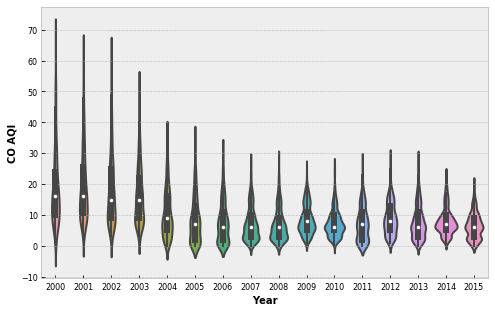

In [15]:
with plt.style.context('bmh'):
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    sns.violinplot(x="Year", y="CO AQI",data=df_los)


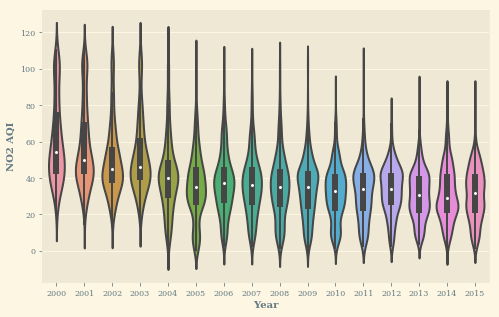

In [16]:
with plt.style.context('Solarize_Light2'):

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    sns.violinplot(x='Year',y='NO2 AQI', data=df_los)



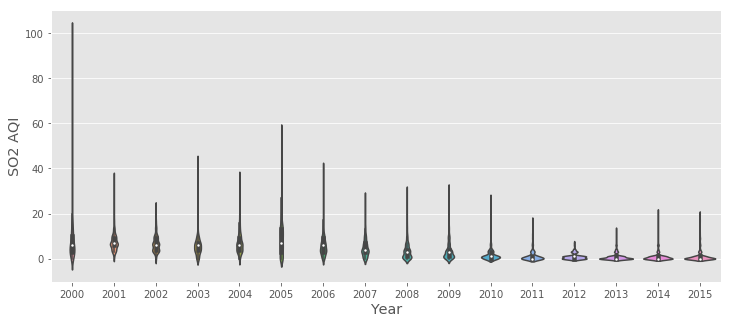

In [17]:
with plt.style.context('ggplot'):

    mpl.rcParams['figure.figsize'] = (12, 5)
    mpl.rcParams['axes.titlesize'] = 'xx-large'
    mpl.rcParams['axes.labelsize'] = 'x-large'

    sns.violinplot(x='Year',y='SO2 AQI', data=df_los)


Here the drastic shift in outlier values from 2000 is striking even though overall decrease didn't start until 2005. We can look at a time series data to confirm this:  

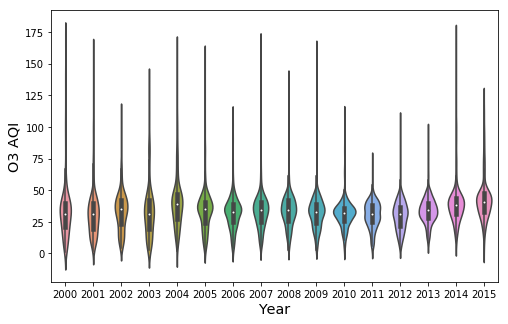

In [18]:
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.violinplot(x='Year',y='O3 AQI', data=df_los)

While O3 outliers have decreased in general if one excludes the peak at 2014, but the overall AQI level has actually increased slightly. In fact, the data seems to suggest after the initial dip between 2009 and 2011, it seems to be getting worse. Perhaps a time series graph can help us visalize this better. 

We'll group the data based on yearly and monthly averages for our plotly time series. 

In [19]:
la_year = df_los.pivot_table(
    index='Year')
la_year.head()

la_month = df_los.pivot_table(
    index='Month')

In [20]:
import plotly
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = la_year.index,
    y=la_year['O3 AQI'],
    mode = 'lines+markers',
    name = "O3")

trace1 = go.Scatter(
     x = la_year.index,
    y= la_year['NO2 AQI'],
    mode = 'lines+markers',
    name = 'NO2')

trace2 = go.Scatter(
     x = la_year.index,
    y= la_year['CO AQI'],
    mode = 'lines+markers',
    name = 'CO')

trace3 = go.Scatter(
    x = la_year.index, 
    y = la_year['SO2 AQI'],
    mode = 'lines+markers', 
    name = 'SO2'
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title = 'Time Series of Pollutants')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Notice how out of all the pollutants, it is only O3 that has gradually increased over time from 32.7 AQI in 2000 to a peak of 43 AQI in 2015.  But fortunately, we can conclude that CO, NO2, and SO2 are declining gradually over time. 

NO2 goes through the largest positive change, dropping from 60 AQI to a steady low 30s. SO2 and CO have gone through encouraging moderate improvements in AQI.

Perhaps there is a seasonal pattern to pollution levels as well. We can look at the la_month dataframe time series. 

In [21]:
import plotly
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = la_month.index,
    y=la_month['O3 AQI'],
    mode = 'lines+markers',
    name = "O3")

trace1 = go.Scatter(
     x = la_month.index,
    y= la_month['NO2 AQI'],
    mode = 'lines+markers',
    name = 'NO2')

trace2 = go.Scatter(
     x = la_month.index,
    y= la_month['CO AQI'],
    mode = 'lines+markers',
    name = 'CO')

trace3 = go.Scatter(
    x = la_month.index, 
    y = la_month['SO2 AQI'],
    mode = 'lines+markers', 
    name = 'SO2'
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title = 'Time Series of Pollutants')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

NO2 decreases in spring and summer while increasing towards fall and reaching peak during the winter. O3 is almost the opposite, except both seems to hit a dip during May to July. 

It's quite strange to see that NO2 and O3 have an inverse pattern in most months. I attempted to learn more about this here: https://www.sciencedirect.com/science/article/pii/S130910421530297X. 

The article states: "Due to the chemical coupling of surface O3 and NOX, the response to NOX emissions reductions is remarkably not linear and any resultant reduction in the level of nitrogen dioxide (NO2) is invariably accompanied by an increase in the atmospheric concentration of O3 (Mazzeo et al., 2005)."

O3 and NO2 depend on each other to be created. For instance: 

NO2 + O2 (+ solar UV-light + heat) --> NO + O3 

So you need nitrogen dioxide to form ozone, but it's also true the other way around: 

NO + O3 --> NO2 + O2

This is an equilibrium reactionn so O3 levels will go down when it's depleted to create NO2. Usually NO is produced abundantly in busy urban areas, and NO picks up O3 in a reaction to stabilize itself to NO2. Consequently, O3 is usually lower in LA compared to a city like Irvine, a suburban city. 

http://www.irceline.be/en/documentation/faq/why-are-ozone-concentrations-higher-in-rural-areas-than-in-cities

However, it will not be a complete inverse pattern because of meterological parameters (ambient temperature, wind velocity, solar radiation, and relative humidity) that have more impact on Ozone AQIs than actual emissions. 

**Conclusion** 

With the exception of O3, all the major pollutants according to AQI - CO, SO2, and NO2 - have declined in Los Angeles substantially since 2000. It's not clear whether this trend has continued till 2019, the current year, as of me typing this.  

# Tableau Visualization

For Tableau, I want to define a columns that contain the year 2000 and 2015. This step is optional. 

You can see the finished visualization here: https://public.tableau.com/profile/zendry.lee#!/vizhome/LosAngelesPollution/Dashboard1

We can add columns by manually inputting a list. First we make three new columns. 

In [22]:
# df_los.to_csv('pollution_la.csv', encoding='utf-8', index=False)